In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [350]:
data = pd.read_csv("circle.csv", names=["x1", "x2", "y"])

In [351]:
data

,x1,x2,y
0,-0.971935,0.846927,0
1,-0.552995,-0.576830,0
2,-0.094904,-0.298862,1
3,-0.809564,0.856891,0
4,0.399009,0.690462,0
...,...,...,...
95,0.989539,0.461170,0
96,-0.740243,0.926098,0
97,0.702734,0.087081,0
98,-0.024213,0.901742,0


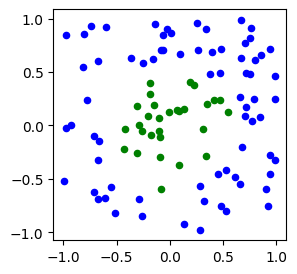

In [352]:
ceros= np.where(data['y']==0)[0]
unos=np.where(data['y']==1)[0]
plt.figure(figsize = [3,3])
plt.scatter(data['x1'][ceros], data['x2'][ceros], color = 'b', s=20)
plt.scatter(data['x1'][unos], data['x2'][unos], color = 'g', s=20)


# **APARTADO 1**
### **Generalizar la función de backpropagation para que contemple la inclusión de una capa oculta. Aplicar la función al ejemplo de la clasificación circular y validar los resultados en el dominio x:[-1, 1], y:[-1, 1]**

### **Preparacion de los datos**

In [353]:
x = data[['x1', 'x2']].T.values
y = data['y'].values.reshape(1, len(data['y'].values))


In [354]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def mse(x,y):
    return np.mean((x-y)**2)

def backprop_mlp(x,y,h=5,epochs=1500,eta=0.1):
    
    np.random.seed(5)
    w1=np.random.uniform(low=-1,high=1,size=[x.shape[0],h])
    w2=np.random.uniform(low=-1,high=1,size=[h,y.shape[0]])
    
    bias1=np.random.uniform(low=0,high=1,size=(h,1))
    bias2=np.random.uniform(low=0,high=1,size=(1,y.shape[0]))
    
    err_batch=[]
    acc_batch=[]
    
    for i in range(epochs):
        A_value= np.dot(w1.T,x) + bias1   # (5,2) dot (2,100) + (5,1) = (5,100)
        a_value= sigmoid(A_value)  #(5,100)  
        B_value= np.dot(w2.T,a_value) + bias2  # (1,5) dot (5,100)  + (1,1) = (1,100)
        b_value= sigmoid(B_value) #(1,100)
        
        err_batch.append(mse(y,b_value)) 
        acc_batch.append(100*np.sum( y == b_value.round(0))/np.shape(y)[1])
        
        Error= b_value - y #(1,100)
        delta= Error * d_sigmoid(B_value) #(1,100)
        dE_dW= np.dot(a_value,delta.T) #(5,100) dot (100,1)  = (5,1)
        dE_dS= np.sum(delta,axis=1,keepdims=True)

        
        dE_dT= np.dot(w2,delta)  #(5,1) dot (1,100) = (5,100)
        delta2= dE_dT *d_sigmoid(A_value) #(5,100)
        dE_dV= np.dot(x,delta2.T) #(2,100) dot (100,5) = (2,5)
        dE_dT= np.sum(delta2,axis=1,keepdims=True) # (5,1)

        
        w1 = w1 - eta * dE_dV # (2,5) - (1,1) * (2,5)
        w2 = w2 - eta * dE_dW # (5,1) - (1,1) * (5,1)

        bias1 = bias1 - eta *dE_dT  #(5,1) - (1,1) * (5,1) =(5,1)
        bias2 = bias2 - eta *dE_dS  # (1,1) -(1,1) * (1,1) = (1,1)
        print('Error:' + str(mse(b_value,y)) ,end='\r', flush=True)
        

    return w1, w2, bias1, bias2, b_value,err_batch, acc_batch

In [355]:
w1_trained, w2_trained, bias1_trained, bias2_trained ,b_value, err_batch, acc_batch= backprop_mlp(x, y)

In [356]:
X1, X2 = np.meshgrid(np.arange(-1,1,0.02),np.arange(-1,1,0.02))
test_output= np.ones_like(X1)*np.nan


In [357]:
for r in np.arange(np.shape(test_output)[0]):
    for c in np.arange(np.shape(test_output)[1]):
        x=np.array([X1[r,c],X2[r,c]]).reshape(2,1)
        a=sigmoid(np.dot(w1_trained.T,x)+bias1_trained)
        test_output[r,c] = sigmoid(np.dot(w2_trained.T,a)+bias2_trained) 

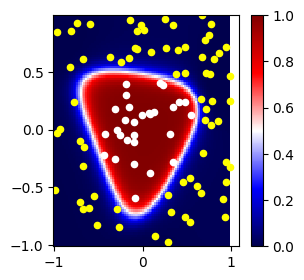

In [358]:
plt.figure(figsize=[3,3])
p = plt.pcolormesh(X1,X2,test_output,cmap="seismic",vmin=0,vmax=1)
plt.scatter(data["x1"][ceros],data["x2"][ceros],color="yellow",s=20)
plt.scatter(data["x1"][unos],data["x2"][unos],color="white",s=20)
plt.colorbar(p)
plt.show()

# **Apartado 2**

### **Si se fija el número máximo de épocas en 1000. ¿Qué número de neuronas ocultas y qué valor de la tasa de aprendizaje (eta) es óptimo para este problema? (basta una solución aproximada).**

In [359]:
x = data[['x1', 'x2']].T.values
y = data['y'].values.reshape(1, len(data['y'].values))


In [360]:
eta=[0.05,0.01,0.1,0.3,0.5,1]
h=[5,10,15,20,25,30]
metricas = [None]*36
errores= [None]*36
accuracy = [None]*36

t=0
for i in eta:
    for j in h: 
        w1_trained, w2_trained, bias1_trained, bias2_trained ,b_value, err_batch, acc_batch= backprop_mlp(x=x, y=y,h=j,epochs=1000,eta=i,)
        metricas[t] = "eta: " + str(i) + ", h: " + str(j)
        errores[t]= err_batch[-1]
        accuracy[t]= acc_batch[-1]
        t+=1
        


In [361]:
print("Obtenemos como valores optimos: metricas->",metricas[errores.index(min(errores))]," con un error:",errores[errores.index(min(errores))]," y un accuracy:", accuracy[errores.index(min(errores))])


Obtenemos como valores optimos: metricas-> eta: 0.3, h: 5  con un error: 0.002645773335387861  y un accuracy: 100.0


# **APARTADO 3**

### **Incluir un término de inercia en el método de *backpropagation***

In [362]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def mse(x,y):
    return np.mean((x-y)**2)

def backprop_mlp(x,y,h=5,epochs=1500,eta=0.1,alpha=0.04):
    
    np.random.seed(5)
    w1=np.random.uniform(low=-1,high=1,size=[x.shape[0],h])
    w2=np.random.uniform(low=-1,high=1,size=[h,y.shape[0]])
    
    bias1=np.random.uniform(low=0,high=1,size=(h,1))
    bias2=np.random.uniform(low=0,high=1,size=(1,y.shape[0]))
    
    err_batch=[]
    acc_batch=[]
    
    dE_dV_inertia= -eta * np.random.uniform(low=0,high=0,size=(2,5))
    dE_dT_inertia= -eta * np.random.uniform(low=0,high=0,size=(5,1))
    dE_dW_inertia= -eta * np.random.uniform(low=0,high=0,size=(5,1))
    dE_dS_inertia= -eta * np.random.uniform(low=0,high=0,size=(1,1))
    
    for i in range(epochs):
        A_value= np.dot(w1.T,x) + bias1   # (5,2) dot (2,100) + (5,1) = (5,100)
        a_value= sigmoid(A_value)  #(5,100)  
        B_value= np.dot(w2.T,a_value) + bias2  # (1,5) dot (5,100)  + (1,1) = (1,100)
        b_value= sigmoid(B_value) #(1,100)
        
        err_batch.append(mse(y,b_value)) 
        acc_batch.append(100*np.sum( y == b_value.round(0))/np.shape(y)[1])
        
        Error= b_value - y #(1,100)
        delta= Error * d_sigmoid(B_value) #(1,100)
        dE_dW= np.dot(a_value,delta.T) #(5,100) dot (100,1)  = (5,1)
        dE_dS= np.sum(delta,axis=1,keepdims=True)

        
        dE_dT= np.dot(w2,delta)  #(5,1) dot (1,100) = (5,100)
        delta2= dE_dT *d_sigmoid(A_value) #(5,100)
        dE_dV= np.dot(x,delta2.T) #(2,100) dot (100,5) = (2,5)
        dE_dT= np.sum(delta2,axis=1,keepdims=True) # (5,1)

        
        w1 = w1 - eta * dE_dV + alpha* dE_dV_inertia # (2,5) - (1,1) * (2,5)
        w2 = w2 - eta * dE_dW + alpha* dE_dW_inertia# (5,1) - (1,1) * (5,1)

        bias1 = bias1 - eta *dE_dT + alpha *  dE_dT_inertia #(5,1) - (1,1) * (5,1) =(5,1)
        bias2 = bias2 - eta *dE_dS + alpha *  dE_dS_inertia  # (1,1) -(1,1) * (1,1) = (1,1)
        
        dE_dV_inertia = -eta *dE_dV
        dE_dT_inertia = -eta *dE_dT
        dE_dW_inertia = -eta *dE_dW
        dE_dS_inertia = -eta *dE_dS
        
        print('Error:' + str(mse(b_value,y)) ,end='\r', flush=True)

    return w1, w2, bias1, bias2, b_value,err_batch, acc_batch

In [363]:
w1_trained, w2_trained, bias1_trained, bias2_trained ,b_value, err_batch, acc_batch= backprop_mlp(x, y)

# **APARTADO 4**

### **Generalizar a un número arbitrario de capas (recomendación, definir los pesos como una lista de matrices, una para cada capa). Aplicar la función al ejemplo de la espiral y validar los resultados en el dominio x:[-1, 1], y [-1, 1].** 

In [364]:
data=pd.read_csv("spiral.csv",names=["x1", "x2", "y"])

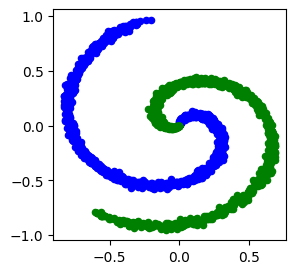

In [365]:
ceros= np.where(data['y']==0)[0]
unos=np.where(data['y']==1)[0]
plt.figure(figsize = [3,3])
plt.scatter(data['x1'][ceros], data['x2'][ceros], color = 'b', s=20)
plt.scatter(data['x1'][unos], data['x2'][unos], color = 'g', s=20)


In [366]:
x = data[['x1', 'x2']].T.values
y = data['y'].values.reshape(1, len(data['y'].values))


In [367]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def mse(x,y):
    return np.mean((x-y)**2)

def backprop_mlp(x,y,capas,epochs=1500,eta=0.1,alpha=0.04):
    np.random.seed(6)
    err_batch=[]
    acc_batch=[]
    
    weights = [None]* (len(capas)+1)
    bias = [None] * (len(capas)+1)
    
    for i in range(len(capas)):
        if i == len(capas):
            break
        elif i ==len(capas)-1 :
            weights[i+1]= np.random.uniform(low=-1,high=1,size=(capas[i],y.shape[0]))
        else:
            weights[i+1] = np.random.uniform(low=-1,high=1,size=(capas[i],capas[i+1]))
    weights[0]= np.random.uniform(low=-1,high=1,size=(x.shape[0],capas[0]))
    
    for n in range(len(capas)):
        bias[n]= np.random.uniform(low=-1,high=1,size=(capas[n],1))
    bias[-1] = np.random.uniform(low=-1,high=1,size=(y.shape[0],1))
    
    for j in range(epochs):
        Y_values= [None]*(len(bias))
        y_values=[None]*(len(bias))
        for p in range(0,len(Y_values)):
            if p == 0:
                Y_values[p]= np.dot(weights[p].T,x) + bias [p]
                y_values[p] = sigmoid(Y_values[p])

            else:
                Y_values[p] = np.dot(weights[p].T,y_values[p-1]) + bias[p]
                y_values[p] = sigmoid(Y_values[p])
                
        err_batch.append(mse(y,y_values[-1]))
        
        d_weights=[None]* len(Y_values)
        d_bias=[None]* len(Y_values)
        
        for q in range(0,len(Y_values)):
            if q == 0:
                Error=y_values[-(1+q)] - y
                d = Error * d_sigmoid(Y_values[-(1+q)])
                d_weights[-(1+q)] = np.dot(y_values[-(2+q)],d.T)
                d_bias[-(1+q)] = np.sum(d,axis=1,keepdims=True)              
            
            elif q== (len(Y_values)-1):
                d_bias[-(1+q)] = np.dot(weights[-q],d)
                d = d_bias[-(1+q)] * d_sigmoid(Y_values[-(1+q)])
                d_weights[0]= np.dot(x,d.T)
                d_bias[0]= np.sum(d, axis=1, keepdims=True)
                
            else:
                d_bias[-(1+q)] = np.dot(weights[-q],d)
                d = d_bias[-(q+1)] * d_sigmoid(Y_values[-(1+q)])
                d_weights[-(q+1)] = np.dot(y_values[-(2+q)],d.T)
                d_bias[-(1+q)] = np.sum(d,axis=1,keepdims=True)
                                                        
                


        for f in range(0,len(d_weights)):
            weights[f] = weights [f] - eta * d_weights[f]
            bias[f] = bias[f] - eta * d_bias[f]
        
        print('Error:' + str(mse(y_values[-1],y)) + "acc:" + str((100*np.sum( y == y_values[-1].round(0))/np.shape(y)[1])),end='\r', flush=True)
                
    return weights, bias, y_values
        

In [368]:
layers=[15,15,15]

In [369]:
weights, bias, y_values = backprop_mlp(x,y,capas=layers,epochs=15000,eta=0.001)

In [372]:
X1, X2 = np.meshgrid(np.arange(-1,1,0.02),np.arange(-1,1,0.02))
test_output= np.ones_like(X1)*np.nan

In [373]:
for r in np.arange(np.shape(test_output)[0]):
    for c in np.arange(np.shape(test_output)[1]):
        x=np.array([X1[r,c],X2[r,c]]).reshape(2,1)
        a=sigmoid(np.dot(weights[0].T,x)+ bias[0])
        b=sigmoid(np.dot(weights[1].T,a)+ bias[1])
        cc=sigmoid(np.dot(weights[2].T,b)+ bias[2])
        test_output[r,c]=sigmoid(np.dot(weights[3].T,cc)+ bias[3])

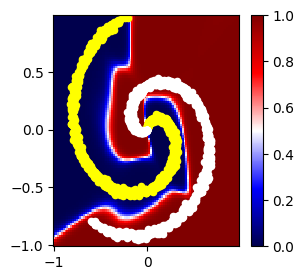

In [374]:
plt.figure(figsize=[3,3])
p = plt.pcolormesh(X1,X2,test_output,cmap="seismic",vmin=0,vmax=1)
plt.scatter(data["x1"][ceros],data["x2"][ceros],color="yellow",s=20)
plt.scatter(data["x1"][unos],data["x2"][unos],color="white",s=20)
plt.colorbar(p)
plt.show()